<center><h1> Análise Exploratória de Dados </h1>
        <h3>Developer: Adolfo de Luna Matias <br>
            DataScience</h3></center>

<center><h2> Projeto utilizando os registros de queimadas do governo federal, 2012- 2018.</h2><center>

<h5> Primeiro passo é importar as bibliotecas do Python - Pandas, Numpy e Matplotlib - o as é como as vamos chamar. </h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib inline nos diz que a demonstração gráfica será na linha do código.

<h5>Em seguida, chamamos a base pelo pandas, utlizando o sep como um delimitador das colunas, pedi apenas o cabeçalho da
coluna para demonstranção e observação de alguns dados com o comando head()</h5>

In [2]:
base = pd.read_csv('http://www.icmbio.gov.br/acessoainformacao/images/stories/PDA/Planilhas/Planilhas_CSV/DIMIF-queima.csv', sep =';')
base.head()
#observe que temos dados NaN e outras inconsistências como vírgulas ao invés de ponto.

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Coordenação Regional do ICMBio,Área estimada da UC (ha),Bioma referencial,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
0,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,CR9 Florianópolis/SC,4.437,Marinho-Costeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,CR8 Rio de Janeiro/RJ,292.600,Mata Atlântica,NaN,"182,1",NaN,NaN,NaN,NaN,NaN
2,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,CR6 Cabedelo/PB,14.918,Marinho-Costeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,CR11 Lagoa Santa/MG,39.957,Cerrado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0002,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,CR11 Lagoa Santa/MG,143.356,Cerrado,NaN,"260,7",NaN,NaN,NaN,NaN,NaN


<h5>Pedi a informação do conteúdo da base desde as LinhasxColuna quanto as informações do tipo de conteúdo: </h5>

In [3]:
#aqui vemos que colunas que deveriam ser númericas estão como object, então devemos tratar primeiro.
base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
Código CNUC                               325 non-null object
Nome da UC                                325 non-null object
Categoria da UC: sigla federal            325 non-null object
Categoria da UC: nomenclatura nacional    325 non-null object
Grupo de Proteção                         325 non-null object
Ano de criação                            325 non-null int64
Coordenação Regional do ICMBio            325 non-null object
Área estimada da UC (ha)                  325 non-null object
Bioma referencial                         325 non-null object
Área queimada em 2018                     39 non-null object
Área queimada em 2017                     78 non-null object
Área queimada em 2016                     52 non-null object
Área queimada em 2015                     50 non-null object
Área queimada em 2014                     32 non-null object
Área queimada em 2013            

<h5>Fiz a troca das vírgulas por ponto para posteriormente transformar em tipo float, utilizei o .iloc, assim pelo iloc consigo selecionar as linhas e colunas que quero, utilizei o .replace() já que estou com  um dataframe e o regex=True para interpretar todos os strings.
<br>Note os comentários: </h5>

In [4]:
base.iloc[:,9:16] = base.iloc[:, 9:16].replace(',','.', regex=True)

## Eu poderia ter feito um comando coluna a coluna, mas seria mais demorado o exemplo seria:

#   base['Área queimada em 2018'] = base['Área queimada em 2018'].str.replace(',','.')

##A diferença é que o str.replace apenas faz em Series, não aceita a mudança em Dataframe, mas o comando replace() aceita!
#Note abaixo a situação pelo .head():

In [5]:
base.head()

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Coordenação Regional do ICMBio,Área estimada da UC (ha),Bioma referencial,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
0,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,CR9 Florianópolis/SC,4.437,Marinho-Costeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,CR8 Rio de Janeiro/RJ,292.600,Mata Atlântica,NaN,182.1,NaN,NaN,NaN,NaN,NaN
2,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,CR6 Cabedelo/PB,14.918,Marinho-Costeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,CR11 Lagoa Santa/MG,39.957,Cerrado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0002,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,CR11 Lagoa Santa/MG,143.356,Cerrado,NaN,260.7,NaN,NaN,NaN,NaN,NaN


<h5>Próximo passo irei transformar linhas e colunas, nos formatos de strings para dados númericos
<br>Descobri uma forma tanto de Serie quanto de números:</h5>

In [6]:
#Esse metódo faz apenas em uma coluna,por Serie:
base['Área estimada da UC (ha)'] = pd.to_numeric(base['Área estimada da UC (ha)'] , errors='coerce')

#Caso queira utilizar em um DataFrame completo ou em determinadas colunas utilizamos o seguinte algoritmo:
base.iloc[:, 9:16] = base.iloc[:, 9:16].apply(pd.to_numeric, errors='coerce')

#pd.to_numeric serve para a transofmração de strings em dados númerico, 
#O coerce serve para converter os não numericos em tipo NaN.

In [7]:
#Se pedirmos a base veremos a mudança para float64:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
Código CNUC                               325 non-null object
Nome da UC                                325 non-null object
Categoria da UC: sigla federal            325 non-null object
Categoria da UC: nomenclatura nacional    325 non-null object
Grupo de Proteção                         325 non-null object
Ano de criação                            325 non-null int64
Coordenação Regional do ICMBio            325 non-null object
Área estimada da UC (ha)                  310 non-null float64
Bioma referencial                         325 non-null object
Área queimada em 2018                     15 non-null float64
Área queimada em 2017                     38 non-null float64
Área queimada em 2016                     14 non-null float64
Área queimada em 2015                     14 non-null float64
Área queimada em 2014                     14 non-null float64
Área queimada em 2013      

<h5> Agora iremos tratar os valores NaN, para fins apenas de resolução de dados iremos converter os NaN em 0.</h5>

In [8]:
#selecionei as linhas e colunas do DataFrame e utilizei o comando fillna() que busca os NaN para substituir:
base.iloc[:,9:16] = base.iloc[:, 9:16].fillna(0)

#Poderia ter feito a seleção em Serie também com alguns comandos do tipo:
    #base['Área queimada em 2018'] = base['Área queimada em 2018'].fillna(0)

In [9]:
#Observe o preenchimento:
base.head()

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Coordenação Regional do ICMBio,Área estimada da UC (ha),Bioma referencial,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
0,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,CR9 Florianópolis/SC,4.437,Marinho-Costeiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,CR8 Rio de Janeiro/RJ,292.600,Mata Atlântica,0.0,182.1,0.0,0.0,0.0,0.0,0.0
2,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,CR6 Cabedelo/PB,14.918,Marinho-Costeiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,CR11 Lagoa Santa/MG,39.957,Cerrado,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000.00.0002,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,CR11 Lagoa Santa/MG,143.356,Cerrado,0.0,260.7,0.0,0.0,0.0,0.0,0.0


<center><h4> Realizado observações, limpezas e tratamentos de dados podemos responder algumas  questões. </h4></center>

<h1>PROJETO 1 - ANÁLISE EXPLORATÓRIA DE DADOS</h1>
<h3> Base de dados das Queimadas</h3>

<h3> 1 - Ano com maior criação de Unidades de conservação (UC):</h3>
<h5> Fiz a partir dos anos de 1980, o ano que mais se criou UC foi:
<br>1º lugar: FHC = (2001, 2002)
<br>2º lugar: Lula = (2005, 2006)<h5>


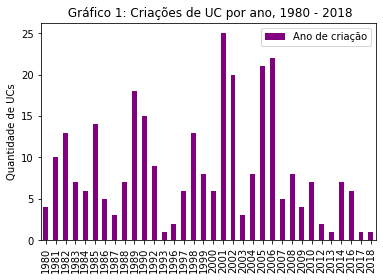

In [10]:
#localização ".loc" e contagem ".value_counts()" dos anos de criação, utilizando uma filtragem a partir dos anos de 1980.
a = base['Ano de criação'].loc[base['Ano de criação']>=1980].value_counts(sort=False ) 
df = pd.DataFrame(a) #transformei uma Serie em DataFrame

#Fiz a contagem de valores ecoloquei em um gráfico com cor e legenda.
gf = df.plot.bar( color='purple', title=' Gráfico 1: Criações de UC por ano, 1980 - 2018') 
plt.ylabel('Quantidade de UCs')
gf


In [11]:
# Contagem com .count() no Ano de criação,e  utilizando o comando .groupby() para agrupar
b = base['Ano de criação'].groupby(base['Ano de criação']).count() #Colocando em grupo a contagem dos anos de criação
df1=pd.DataFrame(data = b) #transformando em um dataframe;

#Coloquei um nome para a coluna e pedi a demonstração, apenas o cabeçalho:
df1.columns =['Quantidade de UCs']
df1.head()

,Quantidade de UCs
Ano de criação,
1937,1
1939,2
1946,1
1959,3
1961,9


<h3> 2 - Construção de DataFrame e gráfico do Bioma Referencial por categoria de UC.</h3>
<h5> Para essa construção utilizei o groupby, para melhor visuaização e didática pedi o agrupamento das UCs pelo Bioma referencial</h5>

In [12]:
c = base['Categoria da UC: nomenclatura nacional'].groupby(base['Bioma referencial']).value_counts()
df2 = pd.DataFrame(data = c)
df2
# Agrupei as categorias de UC pelo bioma referencial, pedi a contagem dos valores e por fim e pedi a descrição dos dados:

Categoria da UC: nomenclatura nacional
Bioma referencial Categoria da UC: nomenclatura nacional                                        
Amazônia          Reserva Extrativista                                                        42
                  Floresta                                                                    34
                  Parque                                                                      21
                  Estação Ecológica                                                           11
                  Reserva Biológica                                                           10
                  Área de Proteção Ambiental                                                   3
                  Área de Relevante Interesse Ecológico                                        3
                  Reserva de Desenvolvimento Sustentável                                       1
Caatinga          Parque                                                                       9
                  Floresta                                                                     6
                  Estação Ecológica                                                            4
                  Área de Proteção Ambiental                                                   3
                  Monumento Natural                                                            1
                  Reserva Biológica                                                            1
                  Reserva Extrativista                                                         1
Cerrado           Parque                                                                      14
                  Área de Proteção Ambiental                                                   9
                  Floresta                                                                     6
                  Reserva Extrativista                                                         6
                  Estação Ecológica                                                            5
                  Área de Relevante Interesse Ecológico                                        2
                  Refúgio de Vida Silvestre                                                    1
                  Reserva Biológica                                                            1
                  Reserva de Desenvolvimento Sustentável                                       1
Marinho-Costeiro  Área de Proteção Ambiental                                                  10
                  Reserva Extrativista                                                         7
                  Reserva Biológica                                                            4
                  Parque                                                                       3
                  Refúgio de Vida Silvestre                                                    3
                  Área de Relevante Interesse Ecológico                                        3
                  Estação Ecológica                                                            2
                  Monumento Natural                                                            1
Mata Atlântica    Parque                                                                      25
                  Floresta                                                                    21
                  Reserva Biológica                                                           15
                  Estação Ecológica                                                            8
                  Área de Proteção Ambiental                                                   7
                  Reserva Extrativista                                                         6
                  Área de Relevante Interesse Ecológico                                        5
                  Refúgio de Vida Silvestre                                      

<h5> Agora construindo os gráficos: </h5>

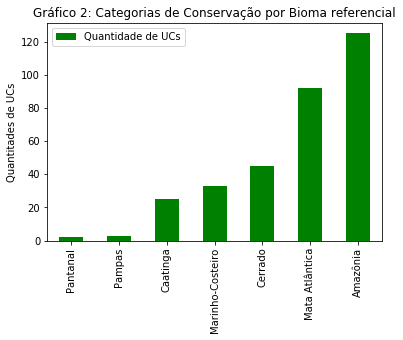

In [13]:
#pedi a contagem dos valores na coluna Bioma referencial, transformei em um dataframe e passei um novo nome;
e = base['Bioma referencial'].value_counts().sort_values(ascending=True)
df3 = pd.DataFrame(e)
df3.columns=['Quantidade de UCs']

#estilizando e plotando o gráfico:
gf0= df3.plot.bar(color= 'Green', title= 'Gráfico 2: Categorias de Conservação por Bioma referencial')
plt.ylabel('Quantitades de UCs')
gf0

#No gráfico vemos os quantidades de cada categoria uc por bioma referencial:

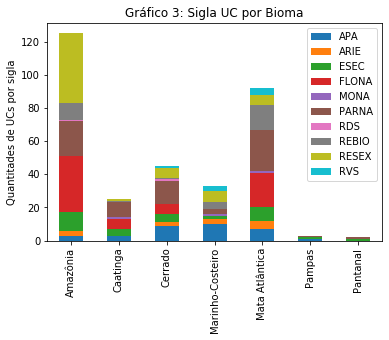

In [14]:
#Um gráfico para visualizar as siglas das categorias de UC por bioma referencial:

#Agrupando diretamente na base de dados as siglas de UC por Bioma refencial
op = base.groupby(['Bioma referencial','Categoria da UC: sigla federal'])

#O modo size() permite verificar o tamanho dos dados,
# aliado ao unstack() faz a plotagem de vários dados em um grupo e o stacked=True empilha esses dados em apenas um grupo
#legend(loc=1) movimenta a legenda da tabela dentro do gráfico
gfop = op.size().unstack().plot(kind="bar", stacked=True,
    title = 'Gráfico 3: Sigla UC por Bioma',).legend(loc=1)

#personalizando o gráfico:
plt.xlabel('')
plt.ylabel('Quantitades de UCs por sigla')
gfop



<h3> 3 - Evolução das áreas queimadas em hectares por ano. </h3>
<h5> O ano de 2014 teve uma das maiores areas em hectares com volumes de queimadas seguido por 2017.</h5>

In [15]:
#utilizei o comando iloc para capturar as linhas e colunas do DataFrame que eu quis selecionar, utilizando a soma por coluna;
f= base.iloc[:,9:16].sum()
f


Área queimada em 2018    4536.0
Área queimada em 2017    8984.1
Área queimada em 2016    6002.8
Área queimada em 2015    6963.1
Área queimada em 2014    9325.0
Área queimada em 2013    3545.9
Área queimada em 2012    3541.7
dtype: float64

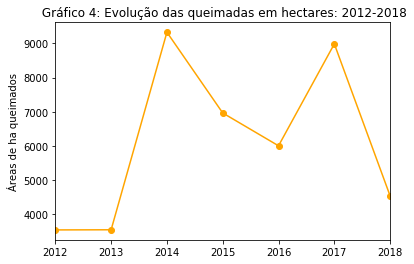

In [16]:
#Aqui fiz a localização  da soma das queimadas por ano e pedi para ordenar de forma ascendente.
f = base.iloc[:, 9:16].sum().sort_index(ascending=True)

#Para melhor visualização renomeei os indices e pedi o gráfico em formato de linha com pontos;
f.index=(['2012', '2013','2014', '2015','2016', '2017','2018'])
gf2 = f.plot(color= 'orange', title=' Gráfico 4: Evolução das queimadas em hectares: 2012-2018', marker='o' )

#veja que usei marcador e agora estou personalizando o nome do eixo y
plt.ylabel('Áreas de ha queimados')
gf2

<h3> 4 - Estados e áreas de queimadas em hectares. </h3>


In [17]:
# localizando e criando um DataFrame único de cada coluna que quero concatenar:
g = base.iloc[:, 6]
h = base.iloc[:, 9:16]
df4 = pd.DataFrame(g)
df5 = pd.DataFrame(h)

#Aqui fiz a concatenação dos DataFrames, o axis=1 é para  concatenar por colunas
df6 = pd.concat([df4,df5], axis=1) 

# Criei uma coluna com a soma dos valores nas coluna, totalizando "ha" queimados, a soma foi usando o axis=1:
df6['Total_queimadas']= df6.iloc[:, 1:8].sum(axis=1) 
df6.head()

,Coordenação Regional do ICMBio,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012,Total_queimadas
0,CR9 Florianópolis/SC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CR8 Rio de Janeiro/RJ,0.0,182.1,0.0,0.0,0.0,0.0,0.0,182.1
2,CR6 Cabedelo/PB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CR11 Lagoa Santa/MG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CR11 Lagoa Santa/MG,0.0,260.7,0.0,0.0,0.0,0.0,0.0,260.7


In [18]:
#Fiz o agrupamento das queimadas pelas coordenações de cada estado, utilizando o sum() das colunas
i =df6[['Área queimada em 2012','Área queimada em 2013','Área queimada em 2014','Área queimada em 2015'
        ,'Área queimada em 2016','Área queimada em 2017','Área queimada em 2018'
        , 'Total_queimadas']].groupby(base['Coordenação Regional do ICMBio']).sum()

#dei um novo nome as colunas das queiadas
i.columns=(['2012','2013','2014','2015','2016', '2017','2018','Total'])
i



,2012,2013,2014,2015,2016,2017,2018,Total
Coordenação Regional do ICMBio,,,,,,,,
CR1 Porto Velho/RO,785.4,527.9,2311.2,410.3,1106.9,2024.8,1226.3,8392.8
CR10 Cuiabá/MT,673.0,854.5,0.0,0.0,0.0,736.4,0.0,2263.9
CR11 Lagoa Santa/MG,809.7,1123.4,2491.9,2166.4,787.3,1661.0,1592.7,10632.4
CR2 Manaus/AM,0.0,0.0,291.7,696.9,917.8,211.6,0.0,2118.0
CR3 Santarém/PA,1273.6,0.0,2284.4,2145.9,877.8,939.0,1080.8,8601.5
CR4 Belém/PA,0.0,332.6,416.2,0.0,237.7,992.2,231.4,2210.1
CR5 Parnaíba/PI,0.0,0.0,0.0,0.0,0.0,155.0,0.0,155.0
CR6 Cabedelo/PB,0.0,549.8,0.0,0.0,0.0,0.0,0.0,549.8
CR7 Porto Seguro/BA,0.0,0.0,695.4,1040.7,1588.1,830.0,328.8,4483.0


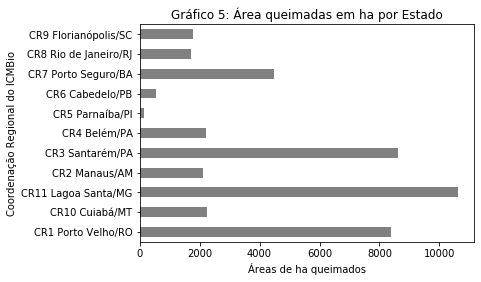

In [19]:
#Gráfico da soma dos valores, veja que o estado de Minas Gerais obteve o maior número de queimadas seguido de Rôndonia e pelo Pará;
gf3 = i.iloc[:, 0:7].plot.barh(color='grey', stacked=True, title= 'Gráfico 5: Área queimadas em ha por Estado', legend=None)

# no gráfico utilizei o localizador de colunas, passei o empilhamento e fiz estilos.
plt.xlabel('Áreas de ha queimados')
gf3
# eu chamei pelo indíce(index) e pedi em formato de barh

****

<h2> Criei mais 6 perguntas  dentro do projeto 1 para treinar, porém ainda não é o projeto 2, ele virá em seguida! </h2>

<h3>5 - Qual tamanho estimado das áreas das unidades de conservação e os anos que foram criadas?</h3>

<BarContainer object of 325 artists>

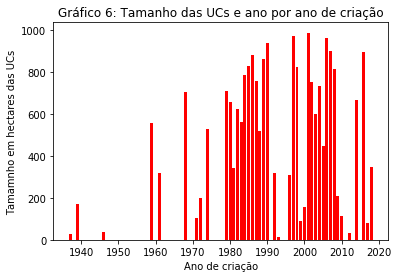

In [20]:
#Aqui fiz a comparação entre os anos de criação das UCS e a a área estimada das UC's em ha;
j = base['Área estimada da UC (ha)']
k = base['Ano de criação']
plt.xlabel('Ano de criação')

#Personalizando o gráfico colocando títulos e legendas de eixos:
plt.ylabel('Tamamnho em hectares das UCs')
plt.title('Gráfico 6: Tamanho das UCs e ano por ano de criação')
gf4 = plt.bar(k,j, color='red')
gf4



<h3>6 - Qual estado tem mais área de conservação em ha e qual tem o menor?</h3>
<h5>Estado com maior unidade de conservação: Rondônia
<br>Estado com menor unidade de coservação: Mato Grosso</h5>

In [21]:
#Aqui fiz soma total da área estimada da uc em "ha" e agrupei pelo estado coordenador da ICMBio, por fim transformei em dataframe;
l = base['Área estimada da UC (ha)'].groupby(base['Coordenação Regional do ICMBio']).sum()
df8 = pd.DataFrame(l)
df8

,Área estimada da UC (ha)
Coordenação Regional do ICMBio,
CR1 Porto Velho/RO,14001.184
CR10 Cuiabá/MT,1565.043
CR11 Lagoa Santa/MG,3108.072
CR2 Manaus/AM,9609.992
CR3 Santarém/PA,9121.570
CR4 Belém/PA,5086.840
CR5 Parnaíba/PI,4069.301
CR6 Cabedelo/PB,5116.364
CR7 Porto Seguro/BA,3398.113


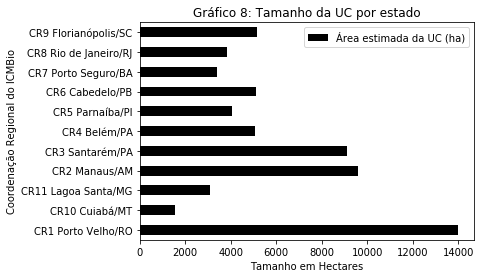

In [22]:
#Pela visualização da tabela e gráfica podemos ver que o estado com maior área estimada de UC é Rôndonia seguido do  Amazonas e Pará;
gf5 = df8.plot.barh(color='black', )

#Personalização:
plt.title('Gráfico 8: Tamanho da UC por estado')
plt.xlabel('Tamanho em Hectares')
gf5

<h3> 7 - Qual Biomal referencial tem mais áreas queimadas no decorrer dos anos e o que teve menos?</h3>
<h5> Amazônia: volume em ha = 21210.7
<br>Marinho-Costeiro: volume em ha = 0.0</h5>


In [23]:
#Adicionei ao DataFrame a coluna "Areas_queimadas" e fiz a soma das colunas das áreas queimadas, usando o axis=1;
base['Areas_queimadas'] = base.iloc[:, 9:16].sum(axis=1)

#pedi apenas a localização e e inciais da tabela para visualização:
base.iloc[:, 9:17].head() 

,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012,Areas_queimadas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,182.1,0.0,0.0,0.0,0.0,0.0,182.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,260.7,0.0,0.0,0.0,0.0,0.0,260.7


<h5> Gerando o DataFrame do total de áreas queimadas agrupado pelo bioma:</h5>

In [24]:
#Agrupei o a soma total por sum() de áreas queimadas pelo bioma referencial:
m = base['Areas_queimadas'].groupby(base['Bioma referencial']).sum()
df9 = pd.DataFrame(m)
df9

,Areas_queimadas
Bioma referencial,
Amazônia,21210.7
Caatinga,356.0
Cerrado,9721.6
Marinho-Costeiro,0.0
Mata Atlântica,10571.7
Pampas,69.6
Pantanal,969.0


<BarContainer object of 7 artists>

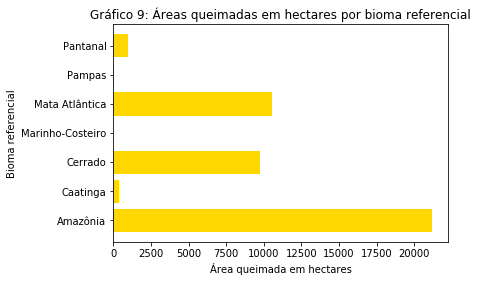

In [25]:
#Chamei o total de áreas queimadas pelo bioma referencial;
gf6 = plt.barh(df9.index,m, color ='gold')

#títulos e nome dos eixos:
plt.title('Gráfico 9: Áreas queimadas em hectares por bioma referencial')
plt.xlabel('Área queimada em hectares')
plt.ylabel('Bioma referencial')
gf6
#O bioma da Amazônia tem o maior ha de bioma queimado desde 2012 áte 2018;
#O que não apresenta é o marinho-costeiro por ser área de alto mar, mas os pampas ainda apresenta o mais baixo.

<h3> 8 - Qual a evolução média de queimadas desde 2012 até 2018?</h3>

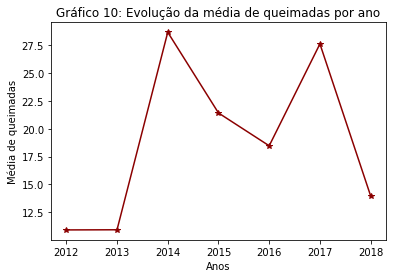

In [26]:
# Vemos o grau de evolução da média de queimadas, o ano de 2014 apresentou a maior.
n = base.iloc[:, 9:16].mean().sort_index(ascending=True) #localização entre todas linhas e as coluna, pedindo a média
o = n.index=(['2012','2013','2014','2015','2016', '2017','2018'])# aqui no índice utlizei outra rotulação;
gf7 = plt.plot(o,n, color='darkred', marker='*') 

#plotei o gráfico  com estilos e marcas no formato linha, colocando nomes de eixos e títulos
plt.xlabel('Anos')
plt.ylabel('Média de queimadas')
plt.title('Gráfico 10: Evolução da média de queimadas por ano')
gf7

In [27]:
#Aqui criei um dataframe aplicando a coluna o nome queimadas e logo depois ao dataframe apliquei nomes de índices.
p = pd.DataFrame(n, columns=['Medias_queimadas'])

#observe que 2014 e 2017 tiveram os maiores médias de queimadas;
p


,Medias_queimadas
2012,10.897538
2013,10.910462
2014,28.692308
2015,21.424923
2016,18.470154
2017,27.643385
2018,13.956923


<h3>9 - Quais os números de queimadas por grupos de proteção? monte uma tabela e gráfico.</h3>

In [28]:
#corrigindo um erro que separava duas variáveis por erro ortográfico;
base['Grupo de Proteção'] = base['Grupo de Proteção'].str.replace('proteção integral','Proteção Integral')

#agrupando os casos totais de queimadas através dos grupos de proteção;
r = base['Areas_queimadas'].groupby(base['Grupo de Proteção']).count()
s = pd.DataFrame(r)
s



,Areas_queimadas
Grupo de Proteção,
Proteção Integral,148
uso sustentável,177


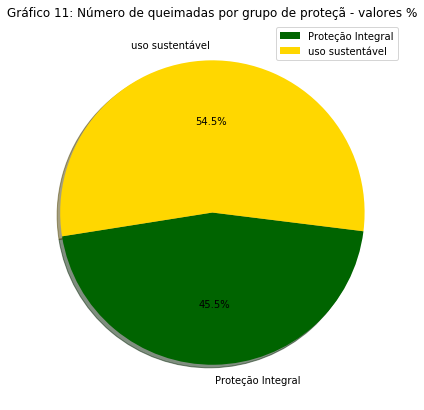

In [29]:
#Fiz o gráfico de pizza  do percentual de números de incêndios por grupo de proteção;
#utilizei o autopct para dizer o nível percentual de cada um;


#Personalização: o gráfico tem uma leve sombra em shadow=True e uma angulação de 189 para melhor visualização.
t = s.plot.pie(y='Areas_queimadas', figsize=(7,7), autopct='%1.1f%%', shadow=True, startangle=189, colors=['darkgreen','gold'],
               title='Gráfico 11: Número de queimadas por grupo de proteçã - valores %' )

#retirando sujeiras no gráfico:
plt.ylabel(None)
t

<h5>54,5% das areás queimadas são de proteção para uso sustentáve;
<br>45,4% das áreas queiadas são de proteção iintegra</h5>

<h3>10 - Qual  a quantidade de categorias da UC: sigla federal por grupo de proteção? Demonstrando graficamente</h3>

In [30]:
#Fiz a chamada de um dataframe agrupando as UC's pelos grupos de proteção 
#pedi a contagem da soma valores por linhas com o value_counts():
z= pd.DataFrame(base['Categoria da UC: sigla federal'].groupby(base['Grupo de Proteção']).value_counts())

#mudei o nome da coluna para ficar didático
z.columns=['Quantidade de UCs']
z


Quantidade de UCs
Grupo de Proteção Categoria da UC: sigla federal                   
Proteção Integral PARNA                                          74
                  ESEC                                           32
                  REBIO                                          31
                  RVS                                             8
                  MONA                                            3
uso sustentável   FLONA                                          67
                  RESEX                                          62
                  APA                                            33
                  ARIE                                           13
                  RDS                                             2

<h5> Plotando o gráfico de forma mais direta: </h5>

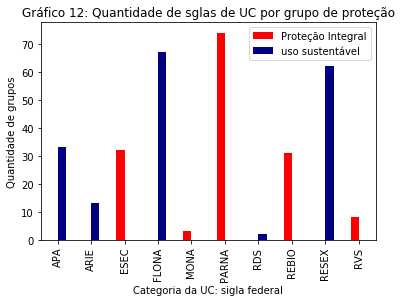

In [31]:
#Transformei minha base em um dataframe agrupando pelas colunas solicitadas e fiz a plotagem gráfica usando o size() e unstakc()
#utilizei o tipo bar e mudei as cores para visualização
wu = base.groupby(['Categoria da UC: sigla federal','Grupo de Proteção']).size().unstack().plot(kind='bar', 
                                                                                                color=['red','navy'])
#personalizando gráfico:
plt.title('Gráfico 12: Quantidade de sglas de UC por grupo de proteção')
plt.ylabel('Quantidade de grupos')
plt.legend(loc='best')


<h1>PROJETO 2 - ANÁLISE EXPLORATÓRIA DE DADOS</h1>
<h3> Base de dados do Desmatamento </h3>

In [32]:
#Chamando a base de dados
dados = pd.read_csv('http://www.icmbio.gov.br/acessoainformacao/images/stories/PDA/Planilhas/Planilhas_CSV/DIMIF_desmatamento.csv', sep=';')

#Chamando a base de dados para primeiras observações:
dados.head()

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Coordenação Regional do ICMBio,Área estimada da UC (ha),Bioma referencial,Monitoramento PRODES,...,PRODES 2006,PRODES 2005,PRODES 2004,PRODES 2003,PRODES 2002,PRODES 2001,PRODES (1998 até 2000),PRODES (acumulado até 1997),Unnamed: 31,Unnamed: 32
0,cnuc,uc,catsigla,catnome,grupo,criacao,cr,area_geo,biocgfun,prodes,...,2006,2005,2004,2003,2002,2001,2000,1997,NaN,NaN
1,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,CR9 Florianópolis/SC,4.437,Marinho-Costeiro,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,CR8 Rio de Janeiro/RJ,292.600,Mata Atlântica,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,CR6 Cabedelo/PB,14.918,Marinho-Costeiro,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,CR11 Lagoa Santa/MG,39.957,Cerrado,Sim,...,"293,4","293,4","390,7","390,7","333,1","333,1","24.379,8",NaN,NaN,NaN


In [33]:
#Pedindo informações da base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 33 columns):
Código CNUC                               328 non-null object
Nome da UC                                328 non-null object
Categoria da UC: sigla federal            328 non-null object
Categoria da UC: nomenclatura nacional    328 non-null object
Grupo de Proteção                         328 non-null object
Ano de criação                            328 non-null object
Coordenação Regional do ICMBio            328 non-null object
Área estimada da UC (ha)                  328 non-null object
Bioma referencial                         328 non-null object
Monitoramento PRODES                      328 non-null object
PRODES 2018                               102 non-null object
PRODES 2017                               98 non-null object
PRODES 2016                               96 non-null object
PRODES 2015                               98 non-null object
PRODES 2014                   

In [34]:
#Eliminando a primeira linha do conjunto de dados com o comando .drop(), na linha usei o index e  axis para linha ou coluna;
#Estes conjuntos eliminados não agregavam nada ao Dataframe, só poluindo visualmente
dados =dados.drop(index=0, axis=0)
dados =dados.drop(columns=['Unnamed: 21', 'Unnamed: 31','Unnamed: 32'], axis=1)


In [35]:
# substituindo pontos por linhas para posteriormente transformar em númerico pelo comando .replace()
dados.iloc[:, 10:]=dados.iloc[:, 10:].replace(',','.', regex=True)

In [36]:
#Transformando o Dataframe em númerico usando o .apply e pedindo para númerico forçando so valores strings para NaN
dados.iloc[:, 10:]=dados.iloc[:, 10:].apply(pd.to_numeric, errors='coerce')

In [37]:
#Preenchendo com zero os valores NaN atráves da localização de or indeice de colunas .iloc()
dados.iloc[:, 10:]=dados.iloc[:, 10:].fillna(0)

<h3>1 - Qual é o total de monitoramento do PRODES por bioma referencial? </h3>
<h5> Fiz o agrupamento bem detalhado pelo DataFrame e fiz o gráfico com as repestas:
<br> Não monitorados: 153 
<br> Monitorados: 174</h5>

In [38]:
dados.iloc[:, 10:]=dados.iloc[:, 10:].apply(pd.to_numeric, errors='coerce')
#Agrupando os dados com o groupby e pedindo a contagens de valores
moni= dados['Bioma referencial'].groupby(dados['Monitoramento PRODES']).value_counts()
#chamando um dataframe:
moniD= pd.DataFrame(moni)
moniD.columns=['Quantidade por Bioma']
moniD

Quantidade por Bioma
Monitoramento PRODES Bioma referencial                      
Não                  Mata Atlântica                       91
                     Marinho-Costeiro                     30
                     Caatinga                             22
                     Amazônia                              3
                     Pampas                                3
                     Cerrado                               2
                     Pantanal                              2
Sim                  Amazônia                            125
                     Cerrado                              43
                     Marinho-Costeiro                      3
                     Caatinga                              2
                     Mata Atlântica                        1

Monitoramento PRODES
Não    153
Sim    174
Name: Bioma referencial, dtype: int64

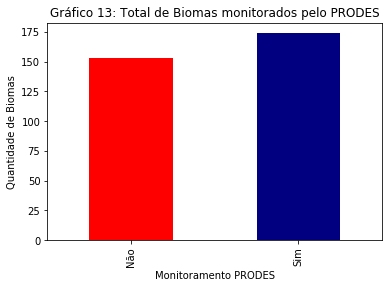

In [39]:
#Realizando o gráfico do Dataframe mas por contagem:
moniG = dados['Bioma referencial'].groupby(dados['Monitoramento PRODES']).count()

#Estilizando e criando o gráfico:
moniG.plot.bar(title='Gráfico 13: Total de Biomas monitorados pelo PRODES', color=['red','navy'])
plt.ylabel('Quantidade de Biomas')
moniG

<h3> 2 - Demonstre a evolução das aréas de desmatamento segundo os dados do PRODES de 1998 até 2018, qual governo tem o maior ano de desmatamento e o que tem o menor?</h3>
<h5> O ano com maior desmatamento é o de 2003, durante o primeiro mandata do presidente Lula;
<br> O ano com menor desmatamento  é o de 2015, durante o íncio do segundo mantado de Dilma Roussef.</h5>

In [40]:
#localização dos registro no dataframe pelo comando .iloc() para somar por .sum() e ordenação pelo .sort_index():
evoD = dados.iloc[:, 10:29].sum().sort_index()

#criação do dataframe:
evoData = pd.DataFrame(evoD)

#dando um nome a coluna do DataFrame:
evoData.columns=['Evolução do Desmatamento']
evoData

,Evolução do Desmatamento
PRODES (1998 até 2000),20772.1
PRODES 2001,16514.4
PRODES 2002,17502.7
PRODES 2003,21161.5
PRODES 2004,17719.0
PRODES 2005,19473.8
PRODES 2006,16823.8
PRODES 2007,15795.6
PRODES 2008,18707.8
PRODES 2009,12992.7


<h5>gerando o gráfico de evolução das áreas desmatadas:</h5>

Text(0.5, 1.0, 'Gráfico 14: Evolução da área de desmatamento, 1998 - 2018.')

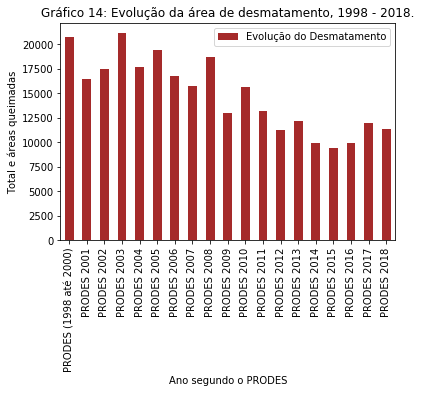

In [41]:
#pedindo pra plotar o gráfico do tiro bar:
evoData.plot.bar(color='brown')

#rotulando eixos e títulos:
plt.ylabel('Total e áreas queimadas')
plt.xlabel('Ano segundo o PRODES')
plt.title('Gráfico 14: Evolução da área de desmatamento, 1998 - 2018.')

<h3> 3 - Qual o total de área desmatada por bioma referencial? 1998-2018</h3>
<h5> Veja que a área mais desmatada é o bioma da Amazônia seguido pelo bioma do cerrado, panpas e pantanal não apresentaram dados de desmatamento pelo PRODES.</h5>

In [42]:
#criei uma nova coluna localizando os valores pelo .iloc que eu quis somar para inserir na coluna via .sum() e usando o axis=1
dados['Desmata_1998-2018'] = dados.iloc[:, 10:29].sum(axis=1)

#Fiz o agrpamento da nova coluna pelo.groupby() pelo bioma refencial e ainda pedi a soma dos valores
medI = dados['Desmata_1998-2018'].groupby(dados['Bioma referencial']).sum()

#transformei meus dados em um DataFrame
biomeD = pd.DataFrame(medI)
biomeD

,Desmata_1998-2018
Bioma referencial,
Amazônia,195823.4
Caatinga,3442.6
Cerrado,75598.0
Marinho-Costeiro,7507.2
Mata Atlântica,21.4
Pampas,0.0
Pantanal,0.0


<h5>plotando a base gráfica do desmatamento pela bioma referencial:</h5>

Text(0.5, 1.0, 'Gráfico 15: Área desmatada por bioma referencial,  1998 - 2018.')

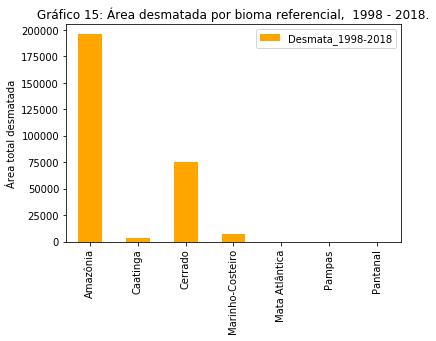

In [43]:
#criando o tipo de gráfico bar com cor laranja
biomeD.plot(kind='bar',color='orange')

#estilizando texto de eixos e títulos
plt.ylabel('Área total desmatada')
plt.xlabel(None)
plt.Text(1.0)
plt.title('Gráfico 15: Área desmatada por bioma referencial,  1998 - 2018.')

<h3> 4 - Frequência da Categoria da UC: sigla federal. </h3>

In [44]:
#O algoritmo abaixo agrupei o monitoraento do Prodes pelos Estados, utilizei o value_counts()  para ver as frequências dos valores Não e sim
#O unstack foi para reunir os valores agrupados para cada índice e dei um sort_values para ordenar pelas colunas e por ascedenten:
fs = dados['Monitoramento PRODES'].groupby(dados['Coordenação Regional do ICMBio']).value_counts().unstack().sort_values(by=['Não','Sim'],ascending=True)

#criando o DataFrame
fsD = pd.DataFrame(fs)
fsD
#Caso interessante de NaN, significado: não existe registro de Não ou Sim para aquela coordenação regional.

Monitoramento PRODES,Não,Sim
Coordenação Regional do ICMBio,,
CR4 Belém/PA,1.0,38.0
CR1 Porto Velho/RO,1.0,40.0
CR10 Cuiabá/MT,2.0,8.0
CR2 Manaus/AM,2.0,27.0
CR5 Parnaíba/PI,7.0,11.0
CR11 Lagoa Santa/MG,7.0,22.0
CR7 Porto Seguro/BA,28.0,1.0
CR8 Rio de Janeiro/RJ,32.0,3.0
CR6 Cabedelo/PB,32.0,NaN


In [45]:
#O NaN significa que não possui registro para aquela coordenação o valor de não ou sim, essa array é de strings...
# Ou seja, esses estados "possuem ou não" monitoramento pelo PRODES, tirando a prova de que no array só existe dois elementos:

dados['Monitoramento PRODES'].unique()
#bserve que são strings a presença do NaN é possível.

array(['Não', 'Sim'], dtype=object)

<h5> montando o gráfico observamos quais estados possuem ou não monitoramento pelo PRODES </h5>

Text(0, 0.5, 'Frequência')

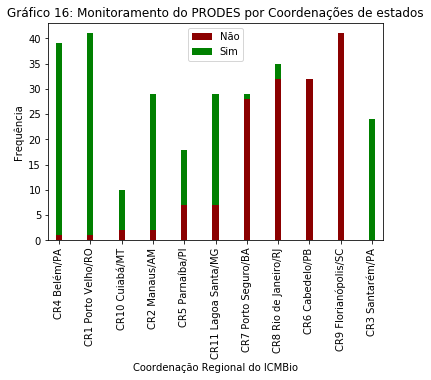

In [46]:
#Contruindo o bar através de empilhamento pelo stacked=True com largura=0.02
fsD.plot.bar(stacked=True, width=0.2, color=['darkred','green'])

#Estilizando o gráfico
plt.legend(loc='upper center')
plt.title('Gráfico 16: Monitoramento do PRODES por Coordenações de estados')
plt.ylabel('Frequência')

<h3> 5 - Tamanho da área desmatada em relação a existência de monitoramento do PRODES? 1998 até 2018.</h3>

In [47]:
#Agrupando a base de dados do Desmatamento 
DesPro =dados['Desmata_1998-2018'].groupby(dados['Monitoramento PRODES']).sum()
DesPro
dsp = pd.DataFrame(DesPro)
dsp
#Observe que a área que não tem monitoramento do PRODES não teve muita área desmatada:

,Desmata_1998-2018
Monitoramento PRODES,
Não,12.6
Sim,282380.0


<h5>A área é tão pequena que some perante ao total monitorado pelo PRODES:</h5>

Text(0.5, 1.0, 'Gráfico 17: Área total desmatada sob monitoramento do PRODES')

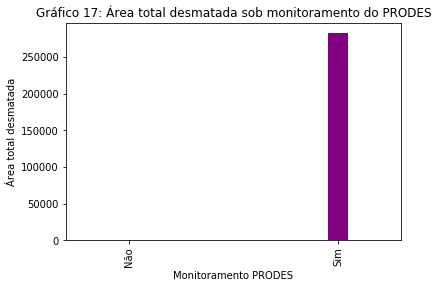

In [48]:
#Plotando o gráfico escolhando a largura da barra e plotando o nome dos eixos e títulos:
DesPro.plot(kind='bar', width=0.1, color='purple')
plt.ylabel('Área total desmatada')
plt.title('Gráfico 17: Área total desmatada sob monitoramento do PRODES')

<h3>6 - Qual o valor da área queimada por bioma até 1997  </h3>

<h5>Para anos abaixo de 1997 existe poucos volumes de desmatamento registrados, apenas no bioma da amazônia e cerrado como <br>podemos ver, na busca por respostas identifiquei que o PRODES existe monitorando desde os anos de 1988, mas as informações
<br>só tiveram legislação para acesso ao púlico em geral só depois de 2004.</h5>

In [49]:
#Agrupando os dados dos desmatamentos pelo Bioma referencial e pedindo a soma dos valores das áreas desmatadas?
sd97= dados['PRODES (acumulado até 1997)'].groupby(dados['Bioma referencial']).sum()

In [50]:
#Pela visualização do dataframe criado abaixo vemos que apenas a amazônia e o cerrado contam com números de áreas desmatadas;
df97 = pd.DataFrame(sd97)
df97

,PRODES (acumulado até 1997)
Bioma referencial,
Amazônia,18202.2
Caatinga,0.0
Cerrado,413.3
Marinho-Costeiro,0.0
Mata Atlântica,0.0
Pampas,0.0
Pantanal,0.0


<h5>plotando o gráfico: </h5>

Text(0, 0.5, 'Área desmatada')

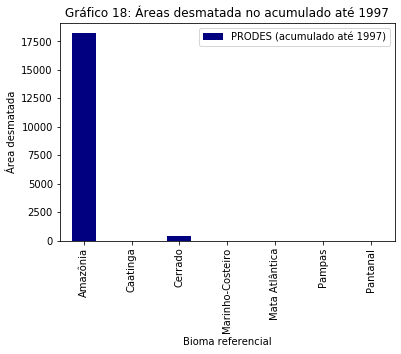

In [51]:
#Aplicando o plot em bar e color navy, colocando eixos e colunas:
df97.plot.bar(color='navy')
plt.title('Gráfico 18: Áreas desmatada no acumulado até 1997')
plt.ylabel('Área desmatada')

<center><h3>FIM</h3><center>